In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit_df = pd.read_csv("data-files/credit_train2.csv", encoding="utf-8")

In [3]:
credit_df.info()
credit_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
credit_df_backup = credit_df.copy()

In [5]:
credit_df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [6]:
# 데이터 탐색 1
credit_df["Loan Status"].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

In [7]:
# 데이터 탐색 2
# credit_df['Credit Score'].head(10)
credit_df['Credit Score'].isnull().sum() / credit_df.shape[0] # missing value ratio
# credit_df['Credit Score'].describe()

0.1956742344350041

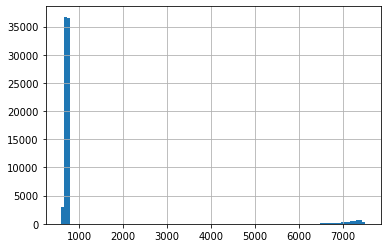

In [8]:
# 데이터 탐색 2-2
credit_df['Credit Score'].hist(bins=100)
plt.show()

In [9]:
# 2-3
credit_df[ credit_df['Credit Score'] > 751 ]['Credit Score'].min()

5850.0

##### map vs. apply
map : Series 에 적용 가능 (셀 단위)  
apply : Series, Dataframe 에 적용 가능 (행 단위)  

In [10]:
# 전처리
credit_df['Credit Score'] = credit_df['Credit Score'].apply(lambda x: (x/10) if x > 751 else x)

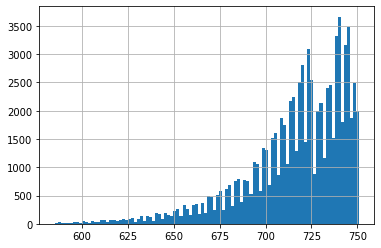

In [11]:
credit_df['Credit Score'].hist(bins=100)
plt.show()

In [12]:
credit_df['Credit Score'].describe()

count    80846.000000
mean       716.293447
std         28.297164
min        585.000000
25%        703.000000
50%        722.000000
75%        738.000000
max        751.000000
Name: Credit Score, dtype: float64

In [13]:
# missing value
print(credit_df['Loan Status'].isna().sum()) # 개수
credit_df['Loan Status'].isna().sum() / credit_df.shape[0]

514


0.005113715502318085

In [14]:
credit_df.dropna(subset=['Loan Status'], inplace=True) # na 값 제거

In [15]:
# Loan Status 분포 확인
credit_df['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

In [16]:
# Loan Status 범주형 인코딩
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
credit_df['Loan Status'] = le.fit_transform(credit_df['Loan Status'])

In [17]:
credit_df['Loan Status'].value_counts()

1    77361
0    22639
Name: Loan Status, dtype: int64

In [18]:
# charged off 에 1을 부여 
credit_df['Loan Status'] = credit_df['Loan Status'].map(lambda x: 0 if x==1 else 1)
credit_df['Loan Status'].value_counts()

0    77361
1    22639
Name: Loan Status, dtype: int64

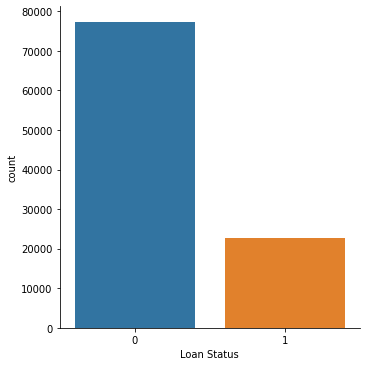

In [19]:
sns.catplot(data=credit_df, x='Loan Status', kind='count') # 범주형 데이터에 적합하게 시각화 (cf. relplot 관계형 데이터)
plt.show()

In [20]:
# 데이터 탐색 3
credit_df['Term'].value_counts()

Short Term    72208
Long Term     27792
Name: Term, dtype: int64

In [21]:
credit_df['Term'].isna().sum()

0

In [22]:
# 범주형 인코딩
credit_df['Term'].replace(('Short Term', 'Long Term'), (0,1), inplace=True)

In [23]:
credit_df['Term'].value_counts()

0    72208
1    27792
Name: Term, dtype: int64

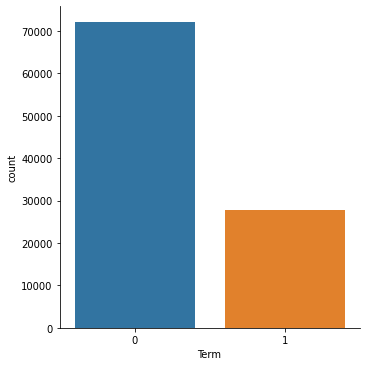

In [24]:
sns.catplot(data=credit_df, x='Term', kind='count')
plt.show()

In [25]:
sterm_mean = credit_df.loc[ credit_df['Term']==0, 'Credit Score'].mean()
lterm_mean = credit_df.loc[ credit_df['Term']==1, 'Credit Score'].mean()
print(sterm_mean, lterm_mean)

724.6209386906824 695.483727170432


In [26]:
# 데이터 탐색 4
credit_df['Credit Score'].isna().sum() / credit_df.shape[0]

0.19154

In [27]:
# missing value 를 term mean 으로 대체
credit_df.loc[(credit_df['Term']==0) & (credit_df['Credit Score'].isna()), 'Credit Score'] = sterm_mean
credit_df.loc[(credit_df['Term']==1) & (credit_df['Credit Score'].isna()), 'Credit Score'] = lterm_mean

In [28]:
# missing value 값을 대체
# from sklearn.impute import SimpleImputer

# credit_df['Credit Score'] = SimpleImputer(strategy='mean').fit_transform(credit_df['Credit Score'].values.reshape(-1,1))

In [29]:
credit_df['Credit Score'].isna().sum()

0

In [30]:
credit_df['Credit Score'].head()

0    709.000000
1    724.620939
2    741.000000
3    721.000000
4    724.620939
Name: Credit Score, dtype: float64

In [31]:
# 양적 데이터를 범주형 데이터로 변경 (Credit Score)
credit_df['Credit Score'] = credit_df['Credit Score'].map(lambda x: 'Poor' if x < 580 else 
                                                                     'Average' if x < 670 else
                                                                     'Good' if x < 740 else
                                                                     'Very Good' if x < 800 else
                                                                     'Excellent')

In [32]:
credit_df['Credit Score'].value_counts()

Good         75506
Very Good    18479
Average       6015
Name: Credit Score, dtype: int64

In [33]:
# 범주형 데이터 인코딩 (one hot encoding)

# from sklearn.preprocessing import OneHotEncoder
# OneHotEncoder().fit_transform(credit_df['Credit Score'].values.reshape(-1,1)).toarray()[:5]

credit_df = credit_df.join(pd.get_dummies(credit_df['Credit Score'], drop_first=False)) # True : average = 0, 0
credit_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,...,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Average,Good,Very Good
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,0,445412.0,0,Good,1167493.0,8 years,Home Mortgage,Home Improvements,...,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,0,1,0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,0,262328.0,0,Good,NaN,10+ years,Home Mortgage,Debt Consolidation,...,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0,1,0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,0,99999999.0,0,Very Good,2231892.0,8 years,Own Home,Debt Consolidation,...,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,0,1
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,0,347666.0,1,Good,806949.0,3 years,Own Home,Debt Consolidation,...,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,0,1,0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,0,176220.0,0,Good,NaN,5 years,Rent,Debt Consolidation,...,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,0,1,0


In [34]:
credit_df.drop('Credit Score', axis=1, inplace=True)
credit_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,...,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Average,Good,Very Good
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,0,445412.0,0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,...,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0,0,1,0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,0,262328.0,0,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,...,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0,1,0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,0,99999999.0,0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,...,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,0,1
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,0,347666.0,1,806949.0,3 years,Own Home,Debt Consolidation,8741.90,...,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0,0,1,0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,0,176220.0,0,NaN,5 years,Rent,Debt Consolidation,20639.70,...,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0,0,1,0


In [35]:
# 데이터분석 5
credit_df['Annual Income'].isnull().sum()

19154

In [36]:
# missing value
annual_income_mean = credit_df['Annual Income'].mean()
credit_df['Annual Income'].fillna(annual_income_mean, inplace=True)

In [37]:
credit_df['Annual Income'].isnull().sum()

0

In [38]:
# 데이터 탐색 6
credit_df['Home Ownership'].head()

0    Home Mortgage
1    Home Mortgage
2         Own Home
3         Own Home
4             Rent
Name: Home Ownership, dtype: object

In [39]:
credit_df['Home Ownership'].value_counts()

Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: Home Ownership, dtype: int64

In [40]:
# 범주형 데이터 인코딩
credit_df = credit_df.join(pd.get_dummies(credit_df['Home Ownership'], drop_first=False))
credit_df.drop('Home Ownership', axis=1, inplace=True)

In [41]:
credit_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Purpose,Monthly Debt,Years of Credit History,...,Maximum Open Credit,Bankruptcies,Tax Liens,Average,Good,Very Good,HaveMortgage,Home Mortgage,Own Home,Rent
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,0,445412.0,0,1.167493e+06,8 years,Home Improvements,5214.74,17.2,...,416746.0,1.0,0.0,0,1,0,0,1,0,0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,0,262328.0,0,1.378277e+06,10+ years,Debt Consolidation,33295.98,21.1,...,850784.0,0.0,0.0,0,1,0,0,1,0,0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,0,99999999.0,0,2.231892e+06,8 years,Debt Consolidation,29200.53,14.9,...,750090.0,0.0,0.0,0,0,1,0,0,1,0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,0,347666.0,1,8.069490e+05,3 years,Debt Consolidation,8741.90,12.0,...,386958.0,0.0,0.0,0,1,0,0,0,1,0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,0,176220.0,0,1.378277e+06,5 years,Debt Consolidation,20639.70,6.1,...,427174.0,0.0,0.0,0,1,0,0,0,0,1


In [42]:
# 데이터 탐색 7
credit_df['Years in current job'].head()

0      8 years
1    10+ years
2      8 years
3      3 years
4      5 years
Name: Years in current job, dtype: object

In [43]:
# 정규 표현식으로 숫자만 남김
credit_df['Years in current job'] = credit_df['Years in current job'].str.extract(r'(\d+)')
credit_df['Years in current job'] = credit_df['Years in current job'].astype(float)

In [44]:
credit_df['Years in current job'].isna().sum()

4222

In [45]:
years_mean = credit_df['Years in current job'].mean()
credit_df['Years in current job'].fillna(years_mean, inplace=True)

credit_df['Years in current job'].isna().sum()

0

In [46]:
credit_df['Years in current job'].describe()

count    100000.000000
mean          5.977594
std           3.426403
min           1.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: Years in current job, dtype: float64

In [47]:
credit_df['Employee History'] = credit_df['Years in current job'].map(lambda x: "Emp Level Jr." if x < 4
                                                                         else "Emp Level Mid" if x < 7
                                                                         else "Emp Level Senior")

credit_df = credit_df.join(pd.get_dummies(credit_df['Employee History'], drop_first=False))

credit_df.drop(['Years in current job', 'Employee History'], axis=1, inplace=True)


In [48]:
credit_df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Average', 'Good',
       'Very Good', 'HaveMortgage', 'Home Mortgage', 'Own Home', 'Rent',
       'Emp Level Jr.', 'Emp Level Mid', 'Emp Level Senior'],
      dtype='object')

In [49]:
credit_df.drop(['Loan ID', 'Customer ID', 'Purpose'], axis=1, inplace=True)
credit_df.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,...,Average,Good,Very Good,HaveMortgage,Home Mortgage,Own Home,Rent,Emp Level Jr.,Emp Level Mid,Emp Level Senior
0,0,445412.0,0,1.167493e+06,5214.74,17.2,NaN,6.0,1.0,228190.0,...,0,1,0,0,1,0,0,0,0,1
1,0,262328.0,0,1.378277e+06,33295.98,21.1,8.0,35.0,0.0,229976.0,...,0,1,0,0,1,0,0,0,0,1
2,0,99999999.0,0,2.231892e+06,29200.53,14.9,29.0,18.0,1.0,297996.0,...,0,0,1,0,0,1,0,0,0,1
3,0,347666.0,1,8.069490e+05,8741.90,12.0,NaN,9.0,0.0,256329.0,...,0,1,0,0,0,1,0,1,0,0
4,0,176220.0,0,1.378277e+06,20639.70,6.1,NaN,15.0,0.0,253460.0,...,0,1,0,0,0,0,1,0,1,0


In [50]:
# 데이터 탐색 8
# 범주형으로 변경
credit_df['Number of Credit Problems'].value_counts()

0.0     86035
1.0     12077
2.0      1299
3.0       378
4.0       125
5.0        49
6.0        17
7.0         8
8.0         4
9.0         2
11.0        2
10.0        2
15.0        1
12.0        1
Name: Number of Credit Problems, dtype: int64

In [51]:
credit_df['Number of Credit Problems'] = credit_df['Number of Credit Problems'].map(lambda x: 'No Credit Problem' if x == 0
                                                                                   else 'Some Credit Problem' if x < 5
                                                                                   else 'Major Credit Problem')

credit_df = credit_df.join(pd.get_dummies(credit_df['Number of Credit Problems'], drop_first=False))

credit_df.drop(['Number of Credit Problems'], axis=1, inplace=True)

In [52]:
# 데이터 탐색 9
# 범주형으로 변경
credit_df['Years of Credit History'].value_counts()

16.0    1340
15.0    1305
17.0    1219
16.5    1176
14.0    1151
        ... 
59.9       1
51.4       1
58.0       1
53.8       1
52.2       1
Name: Years of Credit History, Length: 506, dtype: int64

In [53]:
credit_df['Years of Credit History'] = credit_df['Years of Credit History'].map(lambda x: 'Short Credit Age' if x < 5
                                                                                   else 'Good Credit Age' if x < 17
                                                                                   else 'Exceptional Credit Age')

credit_df = credit_df.join(pd.get_dummies(credit_df['Years of Credit History'], drop_first=False))

credit_df.drop(['Years of Credit History'], axis=1, inplace=True)

In [54]:
credit_df.drop(['Monthly Debt','Months since last delinquent', 'Number of Open Accounts', 'Current Credit Balance',
       'Maximum Open Credit'], axis=1, inplace=True)

In [55]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Loan Status             100000 non-null  int64  
 1   Current Loan Amount     100000 non-null  float64
 2   Term                    100000 non-null  int64  
 3   Annual Income           100000 non-null  float64
 4   Bankruptcies            99796 non-null   float64
 5   Tax Liens               99990 non-null   float64
 6   Average                 100000 non-null  uint8  
 7   Good                    100000 non-null  uint8  
 8   Very Good               100000 non-null  uint8  
 9   HaveMortgage            100000 non-null  uint8  
 10  Home Mortgage           100000 non-null  uint8  
 11  Own Home                100000 non-null  uint8  
 12  Rent                    100000 non-null  uint8  
 13  Emp Level Jr.           100000 non-null  uint8  
 14  Emp Level Mid        

In [56]:
credit_df['Bankruptcies'].value_counts()

0.0    88774
1.0    10475
2.0      417
3.0       93
4.0       27
5.0        7
6.0        2
7.0        1
Name: Bankruptcies, dtype: int64

In [57]:
bankruptcies_mean = int(credit_df['Bankruptcies'].mean())
credit_df['Bankruptcies'].fillna(bankruptcies_mean, inplace=True)

In [58]:
credit_df['Bankruptcies'].isna().sum()

0

In [59]:
credit_df['Bankruptcies'] = credit_df['Bankruptcies'].map(lambda x: 'No Bankruptcies' if x == 0
                                                                else 'Some Bankruptcies' if x < 3
                                                                else 'Many Bankruptcies')

credit_df = credit_df.join(pd.get_dummies(credit_df['Bankruptcies'], drop_first=False))

credit_df.drop(['Bankruptcies'], axis=1, inplace=True)

In [60]:
# 데이터 탐색
credit_df['Tax Liens'].value_counts()

0.0     98062
1.0      1343
2.0       374
3.0       111
4.0        58
5.0        16
6.0        12
7.0         7
9.0         3
11.0        2
15.0        1
10.0        1
Name: Tax Liens, dtype: int64

In [61]:
liens_mean = int(credit_df['Tax Liens'].mean())
credit_df['Tax Liens'].fillna(liens_mean, inplace=True)

In [62]:
credit_df['Tax Liens'] = credit_df['Tax Liens'].map(lambda x: 'No Tax Liens' if x == 0
                                                                else 'Some Tax Liens' if x < 4
                                                                else 'Many Tax Liens')

credit_df = credit_df.join(pd.get_dummies(credit_df['Tax Liens'], drop_first=False))

credit_df.drop(['Tax Liens'], axis=1, inplace=True)

In [63]:
credit_df.to_csv('credit_train3.csv', index=False, encoding='utf-8')

In [64]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Loan Status             100000 non-null  int64  
 1   Current Loan Amount     100000 non-null  float64
 2   Term                    100000 non-null  int64  
 3   Annual Income           100000 non-null  float64
 4   Average                 100000 non-null  uint8  
 5   Good                    100000 non-null  uint8  
 6   Very Good               100000 non-null  uint8  
 7   HaveMortgage            100000 non-null  uint8  
 8   Home Mortgage           100000 non-null  uint8  
 9   Own Home                100000 non-null  uint8  
 10  Rent                    100000 non-null  uint8  
 11  Emp Level Jr.           100000 non-null  uint8  
 12  Emp Level Mid           100000 non-null  uint8  
 13  Emp Level Senior        100000 non-null  uint8  
 14  Major Credit Problem 

In [65]:
credit_df.drop(['Annual Income','Current Loan Amount'], axis=1, inplace=True)

In [66]:
# target, features 분할
X = credit_df.drop("Loan Status", axis=1)
y = credit_df['Loan Status']

In [67]:
# train data, test data 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [68]:
X_train.shape

(70000, 23)

In [69]:
y_train.value_counts()

0    54153
1    15847
Name: Loan Status, dtype: int64

In [70]:
# 모델 만들기, 훈련
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(int(X_train.shape[1] / 2))

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [71]:
# 모델 평가
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.7675, 0.7659666666666667)

In [72]:
# 예측
predicted_values = knn.predict(X_test.values[:10])
print(predicted_values)
print(y_test.values[:10])

[0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 1 0 0 0 0 0]


In [73]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=100000000000)
logreg.fit(X_train, y_train)

LogisticRegression(C=100000000000, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.7736285714285714, 0.7736)

In [75]:
# 예측
predicted_values = logreg.predict(X_test.values[:10])
print(predicted_values)
print(y_test.values[:10])

[0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 1 0 0 0 0 0]


In [76]:
# SVC
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
svc.score(X_train, y_train), svc.score(X_test, y_test)

(0.7736142857142857, 0.7736)

In [78]:
# 예측
predicted_values = svc.predict(X_test.values[:10])
print(predicted_values)
print(y_test.values[:10])

[0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 1 0 0 0 0 0]
